In [1]:
import run_direct
import pybullet as p
import numpy as np
%matplotlib notebook

physicsClient = p.connect(p.DIRECT)  # p.DIRECT for non-graphical version
world = run_direct.World()
robot = run_direct.Husky(brain=run_direct.Brain())
robot.maxForce = 150
robot.targetVelocity = 20

import done


<IPython.core.display.Javascript object>


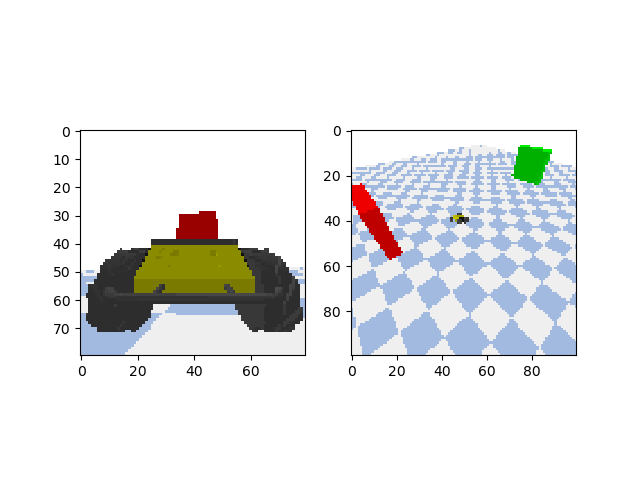

In [2]:
from matplotlib import pyplot as plt
from matplotlib import animation

%matplotlib notebook
world_view_mat = p.computeViewMatrix([-5, 5, 5], [1, 0, -3], [0, 0, 1])
world_projection_mat = p.computeProjectionMatrixFOV(fov=80, aspect=1.0/1.0, nearVal=0.1, farVal=100)

fig = plt.figure()
plt.subplot(121)
robot_img = robot.update()
robot_plot = plt.imshow(robot_img[2], interpolation='none')
plt.subplot(122)
world_img = p.getCameraImage(100,100, viewMatrix = world_view_mat, projectionMatrix=world_projection_mat)
world_plot = plt.imshow(world_img[2], interpolation='none')


def animate(i):
    world.do_step()
    robot_img = robot.update()
    robot_plot.set_data(robot_img[2])
    world_img = p.getCameraImage(100,100, viewMatrix = world_view_mat, projectionMatrix=world_projection_mat)
    world_plot.set_data(world_img[2])

anim1 = animation.FuncAnimation(fig, animate, repeat = True, interval=20)

plt.show()

In [3]:
# p.computeViewMatrix(cam_pos, cam_target, cam_up_vec)

# fig = plt.figure()

# plt.imshow(img2[2], interpolation='none')

In [4]:
world.count_steps


0